In [ ]:
from triglav import Triglav

from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import ExtraTreesClassifier, HistGradientBoostingClassifier
from sklearn.pipeline import make_pipeline
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Create the dataset. The useful features are found in the first 7 columns of X (indicies 0-6)
X, y = make_classification(n_samples=200,
                          n_features=20,
                          n_informative=5,
                          n_redundant=2,
                          n_repeated=0,
                          n_classes=2,
                          shuffle=False,
                          random_state=0)

In [ ]:
X

In [15]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [16]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=0,
                                                   stratify=y)

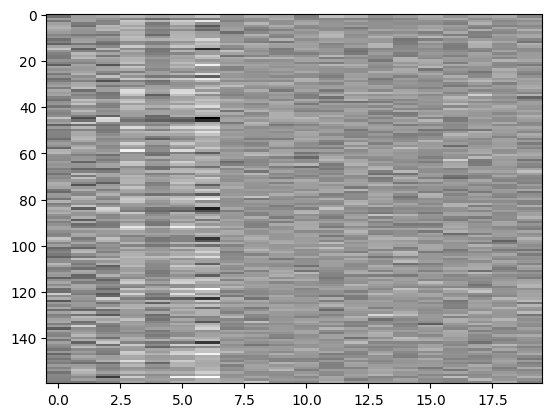

In [17]:
plt.imshow(X_train, cmap='gray', aspect='auto', interpolation='nearest')

In [18]:
# Standardize
s_trf = StandardScaler().fit(X_train)
X_train_std = s_trf.transform(X_train)
X_test_std = s_trf.transform(X_test)

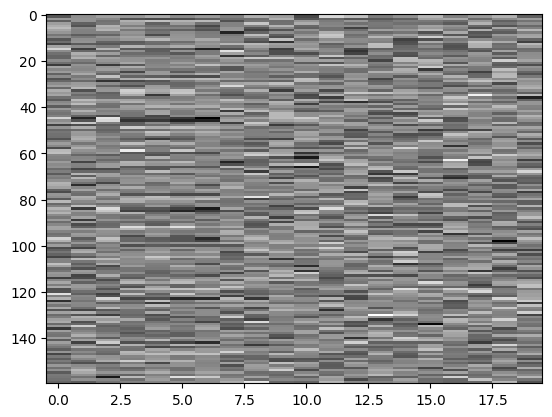

In [19]:
plt.imshow(X_train_std, cmap='gray', aspect='auto', interpolation='nearest')

In [20]:
# Set up Triglav
model = Triglav(estimator=HistGradientBoostingClassifier(min_samples_leaf=15),
               per_class_imp=True,
               n_jobs=16,
               metric="euclidean",
               linkage="ward",
               criterion="maxclust",
               transformer=StandardScaler(),
                verbose=1)

In [21]:
model

Triglav(criterion='maxclust',
        estimator=HistGradientBoostingClassifier(min_samples_leaf=15),
        linkage='ward', metric='euclidean', n_jobs=16, per_class_imp=True,
        transformer=StandardScaler(), verbose=1)

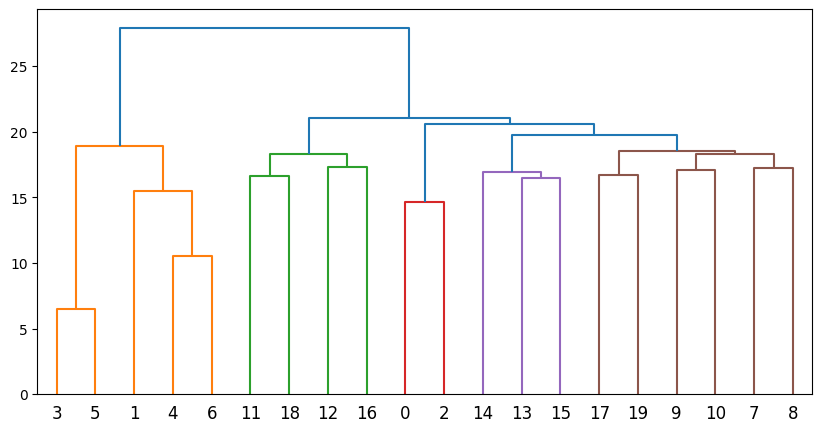

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))
dend = model.visualize_hclust(X_train, y_train, ax=ax)
# optionally save dendrogram to file
plt.savefig('dendrogram.svg')

In [24]:
# Reset the threshold based on inspection of the dendrogram (we are using 9 clusters)
model.thresh = 9

In [25]:
# Identify predictive features
model.fit(X_train, y_train)

Stage One: Identifying an initial set of tentative features...
Round 1 / Tentative (Accepted): 0 / Tentative (Not Accepted): 0 / Rejected: 0
Round 2 / Tentative (Accepted): 0 / Tentative (Not Accepted): 0 / Rejected: 0
Round 3 / Tentative (Accepted): 0 / Tentative (Not Accepted): 0 / Rejected: 0
Round 4 / Tentative (Accepted): 0 / Tentative (Not Accepted): 0 / Rejected: 0
Round 5 / Tentative (Accepted): 0 / Tentative (Not Accepted): 0 / Rejected: 0
Round 6 / Tentative (Accepted): 0 / Tentative (Not Accepted): 0 / Rejected: 0
Round 7 / Tentative (Accepted): 0 / Tentative (Not Accepted): 0 / Rejected: 0
Round 8 / Tentative (Accepted): 0 / Tentative (Not Accepted): 0 / Rejected: 0
Round 9 / Tentative (Accepted): 0 / Tentative (Not Accepted): 0 / Rejected: 0
Round 10 / Tentative (Accepted): 0 / Tentative (Not Accepted): 0 / Rejected: 0
Round 11 / Tentative (Accepted): 0 / Tentative (Not Accepted): 9 / Rejected: 0
Round 12 / Tentative (Accepted): 0 / Tentative (Not Accepted): 9 / Rejected: 

100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [00:39<00:00, 39.66s/it]

Final Feature Set Contains 7 Features.
Final Set of Best Features Contains 3 Features.


Triglav(criterion='maxclust',
        estimator=HistGradientBoostingClassifier(min_samples_leaf=15),
        linkage='ward', metric='euclidean', n_jobs=16, per_class_imp=True,
        thresh=9, transformer=StandardScaler(), verbose=1)

In [26]:
# Transform the test data
X_test_trf = model.transform(X_test)

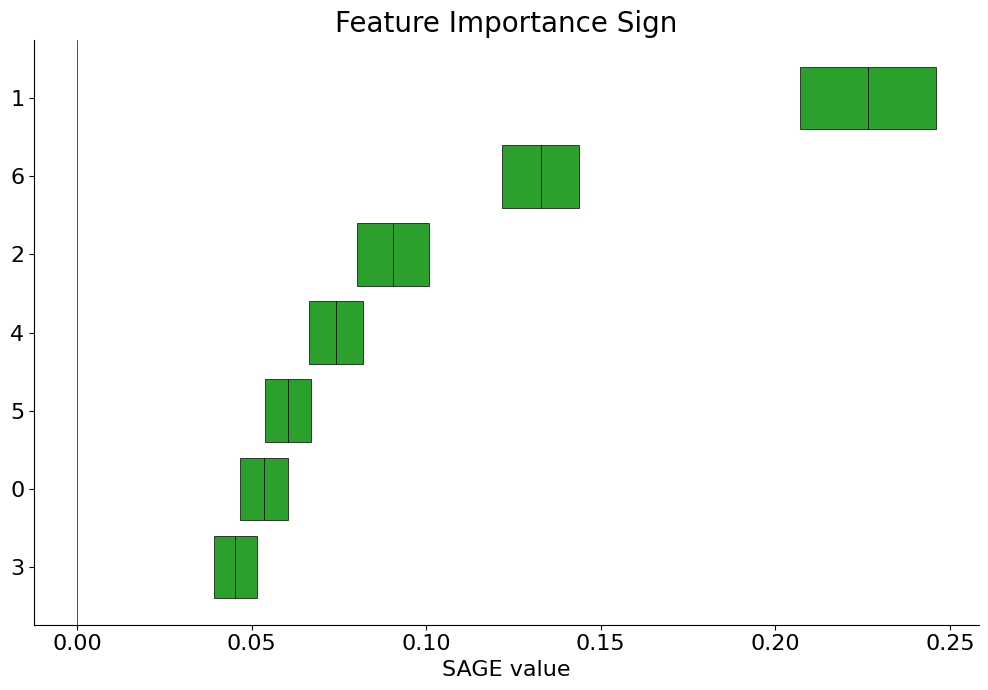

In [27]:
# Visualize feature importance results using SAGE (Figure 2 below)
model.sage_values_.plot_sign(feature_names=np.asarray([i for i in range(20)])[model.selected_])

In [28]:
# Check cross-validation performance (Entire Dataset) (Original Data - Mean Score = 0.895 / Transformed Data - Mean Score = 0.915)
clf = make_pipeline(StandardScaler(), ExtraTreesClassifier(128, random_state=0))

In [29]:
scores = cross_val_score(clf, X, y, cv=10)

In [30]:
scores.mean()

0.8949999999999999

In [31]:
scores = cross_val_score(clf, model.transform(X), y, cv=10)

In [32]:
scores.mean()

0.9149999999999998